In [393]:
#Import basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # only need pyplot
import plotly.express as px
sb.set() # set the default Seaborn style for graphics

In [394]:
#dataset with the theme
theme = pd.read_csv('sets.csv')
theme.head(5)

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [395]:
theme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

In [396]:
figure=px.strip(theme,color='Theme_Group',x = 'Year',y='Pieces',orientation="h")
figure.show()

### Over time, Lego continues to produce more invidividual sets with higher number of pieces. Generating pieces for each set is the main cost factor that determines if LEGO is generating revenue from its original cost. Therefore our main aim is to understand how consumer culture responds to the sets released by LEGO and determine if there are external factors other than number of pieces that affect the set rating to generate more revenue.

In [397]:
#drop the irrelevant columns
theme = theme[['Name','Theme','Pieces','Minifigures','Rating','USD_MSRP','Availability','Theme_Group']]
theme.head(5)

,Name,Theme,Pieces,Minifigures,Rating,USD_MSRP,Availability,Theme_Group
0,PreSchool Set,PreSchool,16.0,NaN,0.0,NaN,{Not specified},Pre-school
1,PreSchool Set,PreSchool,20.0,NaN,0.0,NaN,{Not specified},Pre-school
2,Pre-School Set,Duplo,21.0,NaN,0.0,NaN,{Not specified},Pre-school
3,PreSchool Set,PreSchool,32.0,NaN,0.0,NaN,{Not specified},Pre-school
4,Basic Set,Samsonite,330.0,NaN,0.0,NaN,{Not specified},Vintage


In [398]:
theme.describe()

,Pieces,Minifigures,Rating,USD_MSRP
count,13133.000000,7686.000000,14936.000000,5837.000000
mean,237.935734,2.709862,1.826627,39.967050
std,473.090631,2.955427,1.950909,55.006213
min,0.000000,1.000000,0.000000,1.490000
25%,25.000000,1.000000,0.000000,9.990000
50%,81.000000,2.000000,0.000000,19.990000
75%,262.000000,3.000000,3.900000,49.990000
max,11695.000000,80.000000,4.900000,849.990000


In [399]:
for column in theme.columns:
    missing_values = theme[column].isna().any()
    if missing_values:
        print(f"Column '{column}' has missing values.")
    else:
        print(f"Column '{column}' does not have missing values.")

Column 'Name' does not have missing values.
Column 'Theme' does not have missing values.
Column 'Pieces' has missing values.
Column 'Minifigures' has missing values.
Column 'Rating' does not have missing values.
Column 'USD_MSRP' has missing values.
Column 'Availability' does not have missing values.
Column 'Theme_Group' has missing values.


## <span style="color:#E26EE5">Single Variate Analysis</span>


#### Choose the following variables to predict set rating: 
1. Availability
2. Num of Pieces
3. Num of minifigures
4. USD_MSRP
5. Theme 
6. Theme_Group

## <span style="color:#E26EE5">Analysis for Theme and Theme_Group</span>


In [400]:
unique_values_count = theme['Theme_Group'].nunique()
print("Number of unique values in Theme_Group Column:", unique_values_count)

# Get the number of rows for each type of theme
theme_counts = theme['Theme_Group'].value_counts()

print(theme_counts)

Number of unique values in Theme_Group Column: 16
Theme_Group
Miscellaneous       3407
Modern day          2228
Licensed            2068
Pre-school          1547
Action/Adventure    1177
Basic                827
Model making         725
Technical            594
Constraction         491
Historical           468
Educational          435
Racing               270
Girls                240
Junior               228
Vintage              114
Art and crafts        96
Name: count, dtype: int64


In [401]:
unique_values_count = theme['Theme'].nunique()
print("Number of unique values in Theme Column:", unique_values_count)

# Get the number of rows for each type of theme
theme_counts = theme['Theme'].value_counts()

print(theme_counts)

Number of unique values in Theme Column: 155
Theme
Duplo                      1278
Gear                       1232
Collectable Minifigures     804
City                        770
Star Wars                   723
                           ... 
Life of George                2
Boost                         1
Collectable minifigures       1
Stranger Things               1
Educational                   1
Name: count, Length: 155, dtype: int64


### The columns "Theme" and "Theme_Group" tells us how the Lego sets are categorized. The general parent column, "Theme_Group" will  suffice for exploratory analysis instead of "Theme" because "Theme" has too many unique values and is difficult to analyse. 

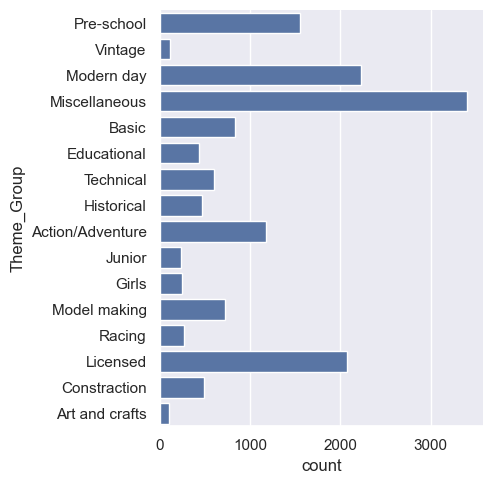

In [402]:
sb.catplot(data = theme,y='Theme_Group',kind='count')

### These are the different types of lego sets based on their unique features

| Theme_Group | Description |
|----------|----------|
|  Pre-School   |   Sets targetted for toddlers aged 18 months-4 years old      |
|  Vintage   |    Old lego sets largely in early 1975 onwards      |
|  Modern Day   |    Lego sets with modern architecturee      |
|  Miscellaneuous   |   Promotional/non-retail/spare parts/service packs/others       |
|  Basic   |     Labelled additional lego parts     |
|  Educational   |   Solution lego sets to stimulate learning       |
|  Technical   |    Lego Automobiles and applications with authentic features      |
|  Historical  |    Lego sets with hsitoric values      |
|  Action/Adventure  |    Lego sets with action/adventure      |
|  Junior  |    Sets targetted for children 4 years old and above      |
|  Girls  |   Sets targetted for girls such as Lego Friends       |
|  Model Making  |    Lego inspired models of reowned arhcitectures      |
|  Racing  |     Lego inspired car figurines      |
|  Licensed  |    Lego inspired sets from franchises such as Harry Potter and Star Wars      |
|  Constraction  |    Large scale action figures from the theme Bionicle      |
|  Art and crafts  |    Lego Arts and design      |


## <span style="color:#E26EE5">Analysis for Number of Pieces</span>

In [403]:
unique_values_count = theme['Pieces'].nunique()
print("Number of unique values in Theme Column:", unique_values_count)

# Get the number of rows for each type of theme
theme_counts = theme['Pieces'].value_counts()

print(theme_counts)

Number of unique values in Theme Column: 1372
Pieces
6.0       305
1.0       267
7.0       227
8.0       209
4.0       206
         ... 
2464.0      1
2262.0      1
866.0       1
1869.0      1
1653.0      1
Name: count, Length: 1372, dtype: int64


In [404]:
## check for missing values
missing_values = theme['Pieces'].isna().any()
if missing_values:
    print("Pieces has missing values.")
else:
    print("Pieces does not have missing values.")

Pieces has missing values.


In [405]:
#remove the missing values
theme = theme.dropna(subset=['Pieces'])
theme.head(5)
theme.shape

(13133, 8)

In [406]:
## check the missing value
missing_values = theme['Pieces'].isna().any()
if missing_values:
    print("Pieces has missing values.")
else:
    print("Pieces does not have missing values.")

Pieces does not have missing values.


C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\1192154496.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




<Axes: xlabel='Pieces', ylabel='Density'>

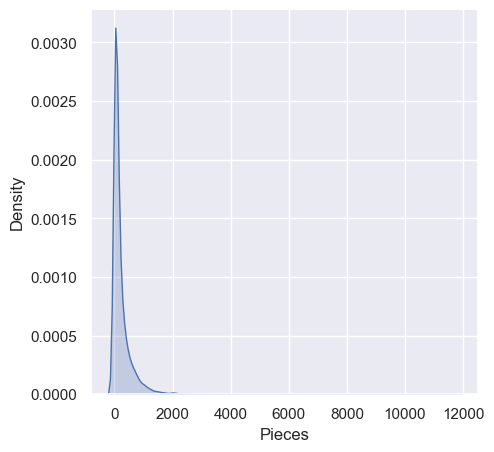

In [407]:
f, axes = plt.subplots(figsize=(5, 5))

sb.kdeplot(theme['Pieces'], shade=True)

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



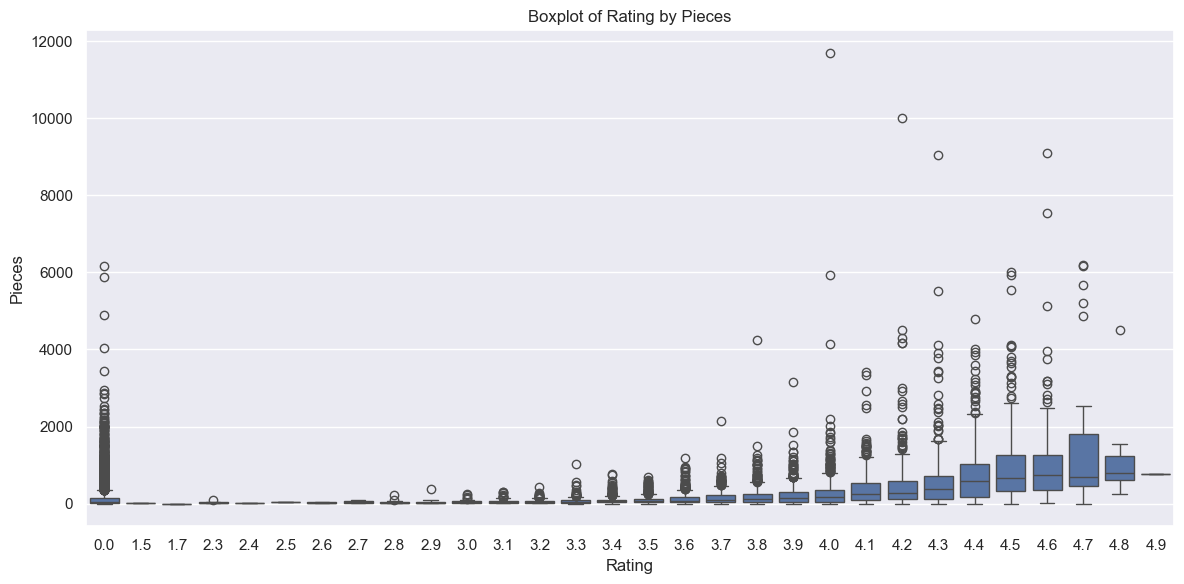

In [408]:
##plot against rating
plt.figure(figsize=(12, 6))
sb.boxplot(data=theme, y='Pieces', x='Rating')
plt.title('Boxplot of Rating by Pieces')
plt.xlabel('Rating')
plt.ylabel('Pieces')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## <span style="color:#E26EE5">Analysis for Availability</span>

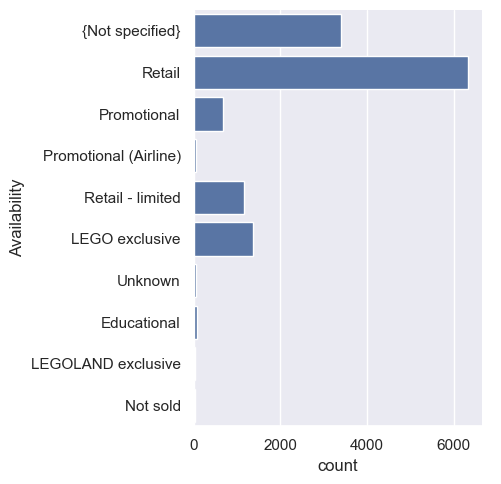

In [409]:
sb.catplot(y='Availability' , data = theme,kind = 'count')

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



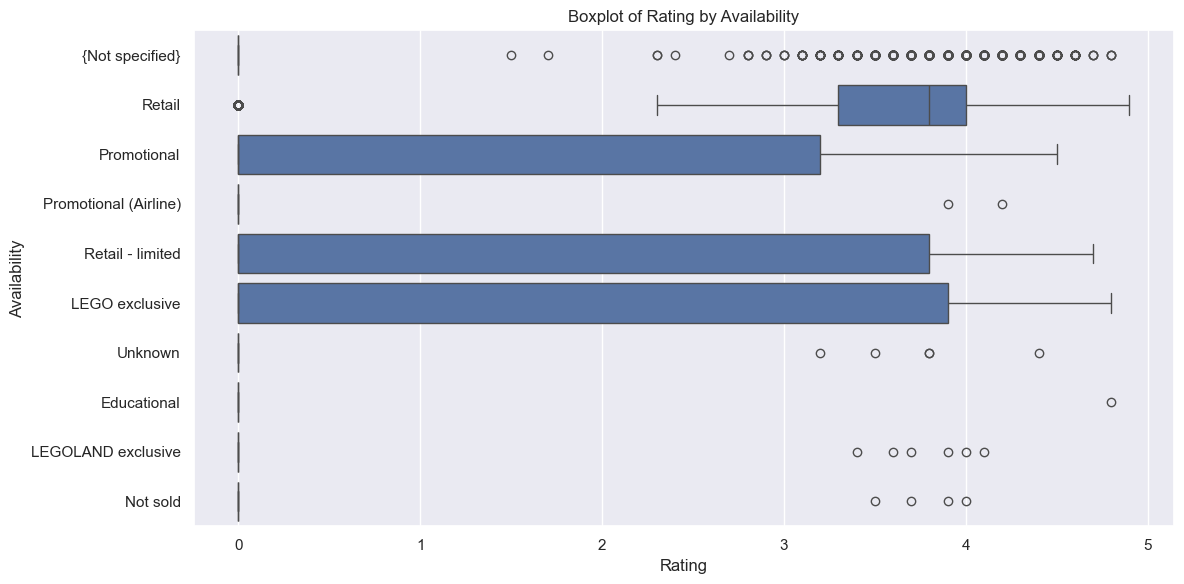

In [410]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=theme, y='Availability', x='Rating')
plt.title('Boxplot of Rating by Availability')
plt.xlabel('Rating')
plt.ylabel('Availability')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### choose to keep only Retail, Promotional, Retail-Limited and LEGO Exclusive because the boxplot shows that there is v less data between the other values against rating

In [411]:
# List of specific values to keep
specific_values = ['Retail','Retail - limited', 'Promotional', 'LEGO exclusive']

# Boolean indexing to filter rows with specific values
theme = theme[theme['Availability'].isin(specific_values)]

unique_values_count = theme['Availability'].unique()
print("Number of unique values in column 'A':", unique_values_count)

Number of unique values in column 'A': ['Retail' 'Promotional' 'Retail - limited' 'LEGO exclusive']


## <span style="color:#E26EE5">Analysis for USD_MSRP</span>

In [412]:
## check for missing values
missing_values = theme['USD_MSRP'].isna().any()
if missing_values:
    print("USD_MSRP has missing values.")
else:
    print("USD_MSRP does not have missing values.")

USD_MSRP has missing values.


In [413]:
## remove na
#remove the missing values
theme = theme.dropna(subset=['USD_MSRP'])
theme.head(5)
theme.shape

(4638, 8)

In [414]:
##check if actually emoved
missing_values = theme['USD_MSRP'].isna().any()
if missing_values:
    print("USD_MSRP has missing values.")
else:
    print("USD_MSRP does not have missing values.")

USD_MSRP does not have missing values.


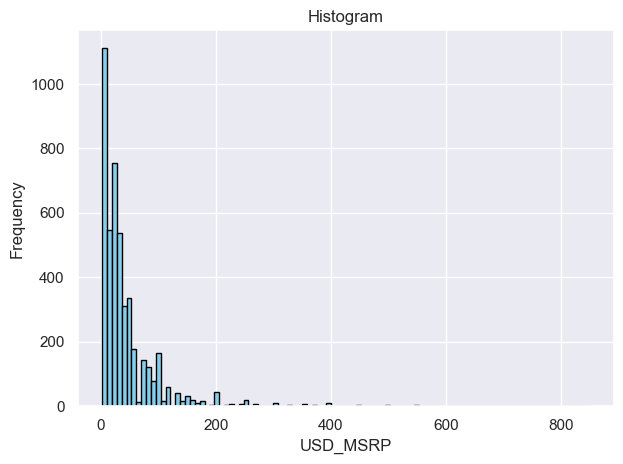

In [415]:
plt.hist(theme['USD_MSRP'], bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('USD_MSRP')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



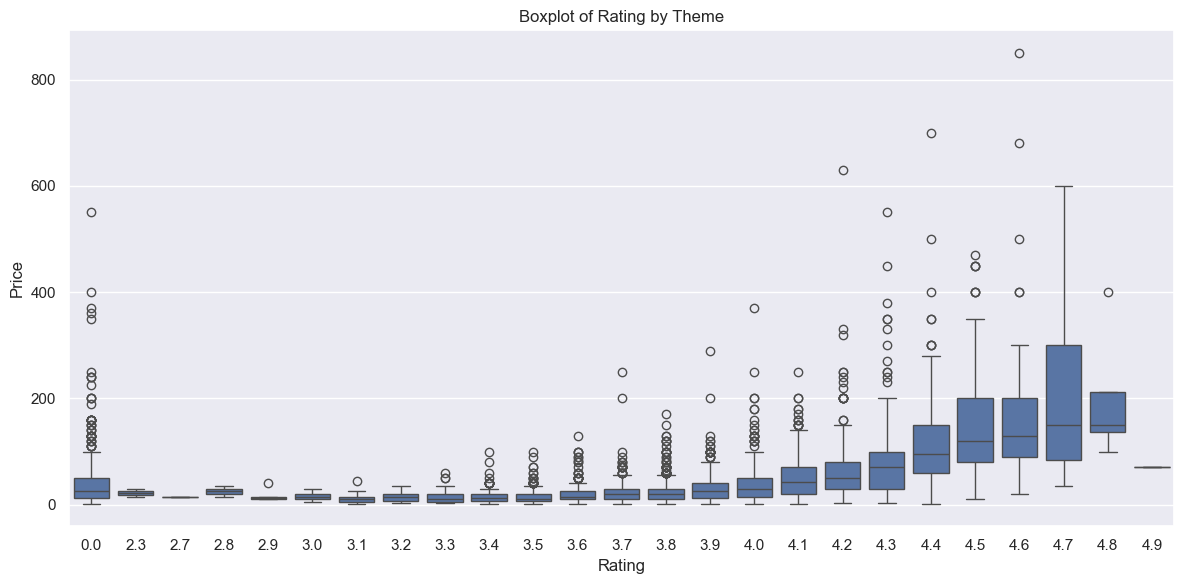

In [416]:
## plot against rating
plt.figure(figsize=(12, 6))
sb.boxplot(data=theme, y='USD_MSRP', x='Rating')
plt.title('Boxplot of Rating by Theme')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Can see that sets with higher prices tend to have higher ratings. 0 rating is neglibable. Most sets generally have a rating 3.4-5.0

## <span style="color:#E26EE5">Analysis for MiniFigs</span>

In [417]:
unique_values_count = theme['Theme'].nunique()
print("Number of unique values in Theme Column:", unique_values_count)

# Get the number of rows for each type of theme
theme_counts = theme['Theme'].value_counts()

print(theme_counts)
theme.shape

Number of unique values in Theme Column: 100
Theme
City               526
Star Wars          386
Friends            331
Duplo              264
Ninjago            259
                  ... 
Books                1
Vikings              1
Make and Create      1
Education            1
World Racers         1
Name: count, Length: 100, dtype: int64


(4638, 8)

In [418]:
## check for missing values
missing_values = theme['Minifigures'].isna().any()
if missing_values:
    print("Minifigures has missing values.")
else:
    print("Minifigures does not have missing values.")

Minifigures has missing values.


In [419]:
# Replace NaN values with 0 in the 'Column' column
theme['Minifigures'] = theme['Minifigures'].fillna(0)

print(theme)

                                  Name       Theme  Pieces  Minifigures  \
1706                    Straight Rails      Trains     8.0          0.0   
1707                      Curved Rails      Trains     8.0          0.0   
1708          Manual Points with Track      Trains     6.0          0.0   
1713   Transformer and Speed Regulator      Trains     3.0          0.0   
2397             Building Plate, Green       Basic     1.0          0.0   
...                                ...         ...     ...          ...   
14903            Mei's Guardian Dragon  Monkie Kid   605.0          0.0   
14904            The Mighty Azure Lion  Monkie Kid   789.0          0.0   
14905        Dragon of the East Palace  Monkie Kid  2364.0          0.0   
14906           Lunar New Year Display    Seasonal   872.0          0.0   
14907            Lunar New Year Parade    Seasonal  1653.0         18.0   

       Rating  USD_MSRP      Availability       Theme_Group  
1706      4.0     12.99            Re

In [420]:
## check for missing values
missing_values = theme['Minifigures'].isna().any()
if missing_values:
    print("Minifigures has missing values.")
else:
    print("Minifigures does not have missing values.")

Minifigures does not have missing values.


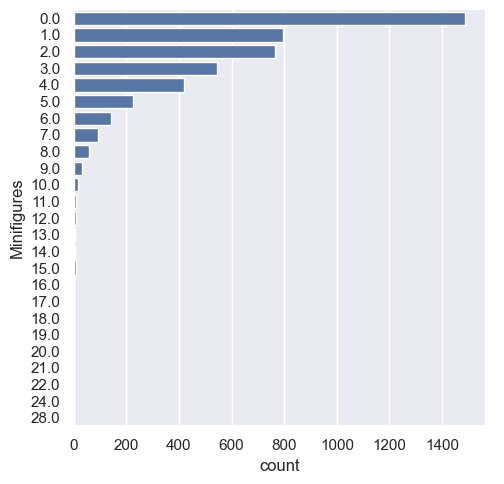

In [421]:
sb.catplot(data = theme,y='Minifigures',kind='count')

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Rating', ylabel='Minifigures'>

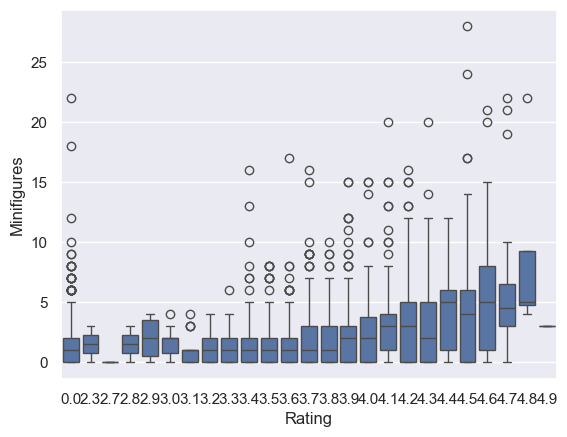

In [422]:
sb.boxplot(data = theme,x='Rating',y='Minifigures')

## <span style="color:#E26EE5">Analysing the Ratings</span>


In [423]:
## check for missing values
missing_values = theme['Rating'].isna().any()
if missing_values:
    print("Rating has missing values.")
else:
    print("Rating does not have missing values.")

Rating does not have missing values.


In [424]:
unique_values_count = theme['Rating'].unique()
print("Number of unique values in column 'A':", unique_values_count)

Number of unique values in column 'A': [4.  3.8 3.7 4.1 4.4 3.9 0.  4.6 4.2 3.6 3.5 4.7 3.4 4.3 4.5 3.3 3.2 4.9
 3.  3.1 2.7 2.3 2.8 2.9 4.8]


In [425]:
theme = theme[theme['Rating']!=0.0]

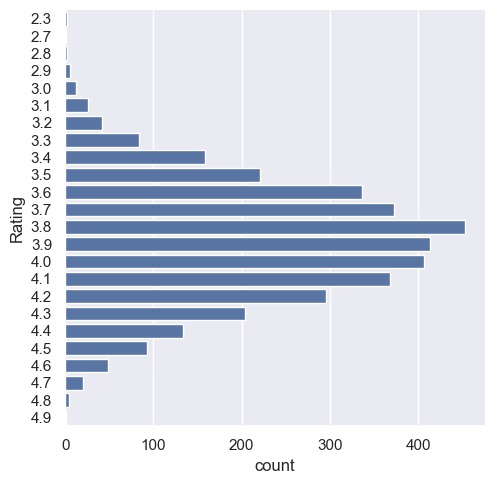

In [426]:
sb.catplot(y='Rating' , data = theme,kind = 'count')

In [427]:
# Round ratings to the nearest integer
theme['Rating'] = theme['Rating'].round()

unique_values_count = theme['Rating'].unique()
print("Number of unique values in column 'A':", unique_values_count)

Number of unique values in column 'A': [4. 5. 3. 2.]


C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\2026574608.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



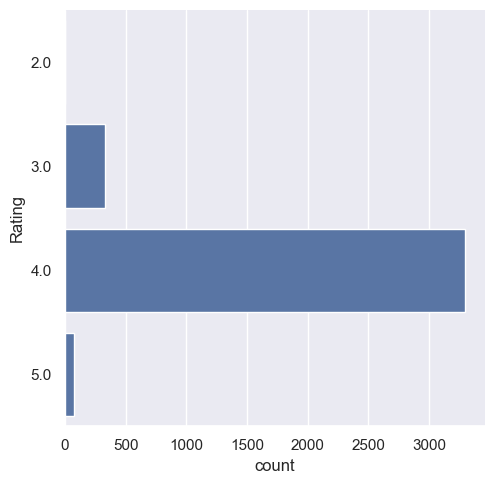

In [428]:
sb.catplot(y='Rating' , data = theme,kind = 'count')

From the above graph, the review score of a is significantly in larger numbers than the other review score. The review score is floor divided by 4. This is because 1//3 = 0 2//3 = 0 3//3 = 1 4//3 = 1 5//3 = 1 This allows us to not use a if statement which can help reduce time complexity.

C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\54713427.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



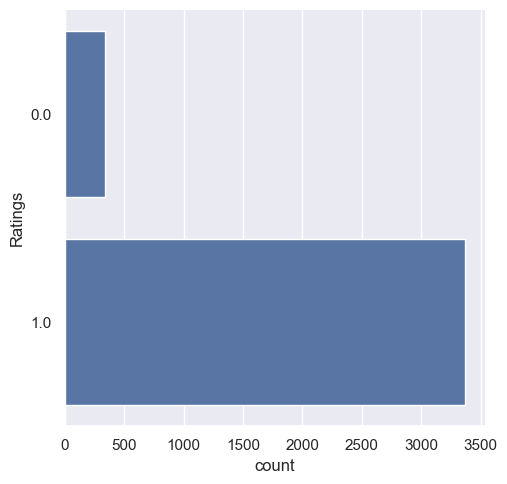

In [429]:
# Calculating the rating
theme.loc[:,"Ratings"] = theme["Rating"]//4
sb.catplot(y = "Ratings", data = theme, kind = "count")

In [430]:
# Class count
rating_counts = theme['Ratings'].value_counts()

# Number of values in class 0
rating_class_0 = rating_counts.get(0, 0)

# Number of values in class 1
rating_class_1 = rating_counts.get(1, 0)

print("Number of values in class 0:", rating_class_0)
print("Number of values in class 1:", rating_class_1)

Number of values in class 0: 333
Number of values in class 1: 3370


In [431]:
theme.drop(columns = ['Rating'], inplace = True)
def balancing(theme):
    # Class count
    rating_class_1, rating_class_0 = theme['Ratings'].value_counts()

    # Divide by class
    df_rating_0 = theme[theme['Ratings'] == 0]
    df_rating_1 = theme[theme['Ratings'] == 1]

    # Oversample the minority class (class 0) to match the number of instances in the majority class (class 1)
    df_rating_0_over = df_rating_0.sample(rating_class_1, replace=True)

    # Concatenate the oversampled DataFrame with the DataFrame of class 1 instances
    balanced_theme = pd.concat([df_rating_1, df_rating_0_over], axis=0)

    return balanced_theme

C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\2342857386.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



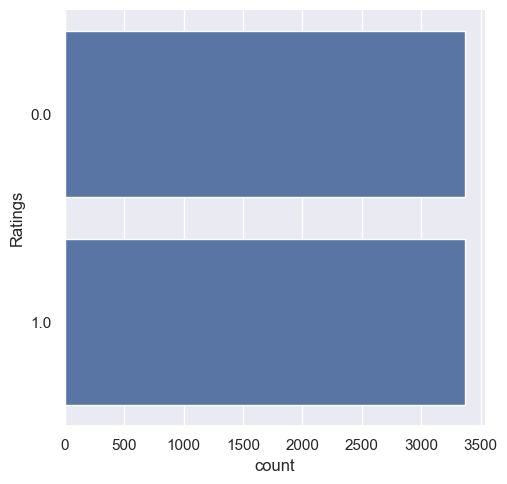

In [432]:
#cleaning the rating 
# rebalance the rating 

theme = balancing(theme)
sb.catplot(y = "Ratings", data = theme, kind = "count")


In [433]:
# Class count
rating_counts = theme['Ratings'].value_counts()

# Number of values in class 0
rating_class_0 = rating_counts.get(0, 0)

# Number of values in class 1
rating_class_1 = rating_counts.get(1, 0)

print("Number of values in class 0:", rating_class_0)
print("Number of values in class 1:", rating_class_1)

Number of values in class 0: 3370
Number of values in class 1: 3370


## <span style="color:#E26EE5">Multi-variate Analysis</span>


Reason why we did not go with a correlation matrix

In [434]:
# Select specific columns for correlation
specific_columns = ['USD_MSRP', 'Pieces', 'Minifigures','Ratings']

# Compute correlation matrix for selected columns
correlation_matrix = theme[specific_columns].corr()

print(correlation_matrix)


             USD_MSRP    Pieces  Minifigures   Ratings
USD_MSRP     1.000000  0.914389     0.429528  0.331298
Pieces       0.914389  1.000000     0.358302  0.317205
Minifigures  0.429528  0.358302     1.000000  0.215897
Ratings      0.331298  0.317205     0.215897  1.000000


#### Choose the following variables to predict set rating: 
1. Availability
2. Num of Pieces
3. Num of minifigures
4. USD_MSRP
5. Theme_Group

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='Pieces'>

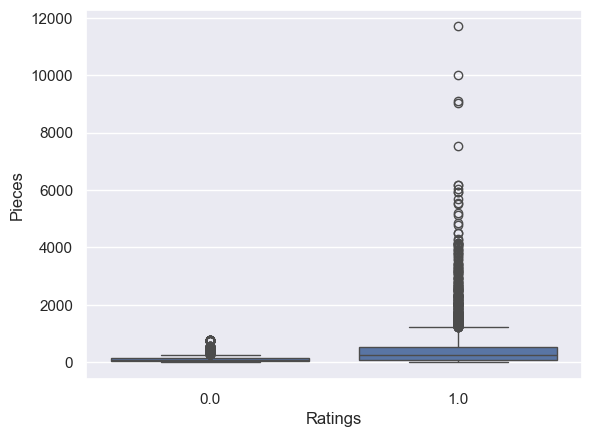

In [435]:
##pieces against ratings
sb.boxplot(data = theme,x = 'Ratings', y='Pieces')

In [436]:
def remove_outliers_iqr(df, categorical_column, numerical_column):
    # Split the DataFrame based on the categorical values (0 and 1)
    df_0 = df[df[categorical_column] == 0]
    df_1 = df[df[categorical_column] == 1]
    
    # Define a function to remove outliers using IQR method
    def remove_outliers_iqr_inner(data):
        Q1 = data[numerical_column].quantile(0.25)
        Q3 = data[numerical_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[numerical_column] >= lower_bound) & (data[numerical_column] <= upper_bound)]
    
    # Remove outliers from each category
    df_0_cleaned = remove_outliers_iqr_inner(df_0)
    df_1_cleaned = remove_outliers_iqr_inner(df_1)
    
    # Combine the cleaned datasets
    cleaned_df = pd.concat([df_0_cleaned, df_1_cleaned])
    
    return cleaned_df

# Usage
cleaned_data_iqr = remove_outliers_iqr(theme, 'Ratings', 'Pieces')


In [437]:
print(theme.shape)

(6740, 8)


In [438]:
cleaned_data_iqr.shape

(6273, 8)

In [439]:
cleaned_data_iqr.head(5)

,Name,Theme,Pieces,Minifigures,USD_MSRP,Availability,Theme_Group,Ratings
11730,City Advent Calendar,City,248.0,6.0,29.99,Retail,Modern day,0.0
7619,Space Speeder,Space,14.0,1.0,3.49,Retail,Action/Adventure,0.0
9612,Cat's Playground,Friends,31.0,0.0,4.99,Retail,Modern day,0.0
12594,Ariel's Castle,Disney,115.0,1.0,24.99,Retail,Licensed,0.0
10881,Homing Spider Droid Microfighter,Star Wars,102.0,1.0,9.99,Retail,Licensed,0.0


C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



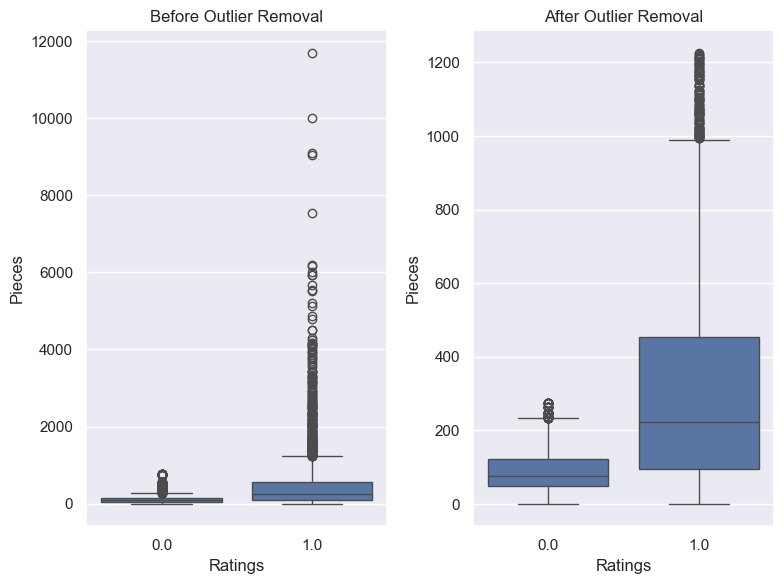

In [440]:
def plot_boxplot(df, categorical_column, numerical_column, cleaned_data):
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 2, 1)
    sb.boxplot(x=df[categorical_column], y=df[numerical_column])
    plt.title('Before Outlier Removal')
    
    plt.subplot(1, 2, 2)
    sb.boxplot(x=cleaned_data[categorical_column], y=cleaned_data[numerical_column])
    plt.title('After Outlier Removal')
    
    plt.tight_layout()
    plt.show()

# Usage
plot_boxplot(theme, 'Ratings', 'Pieces', cleaned_data_iqr)


C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



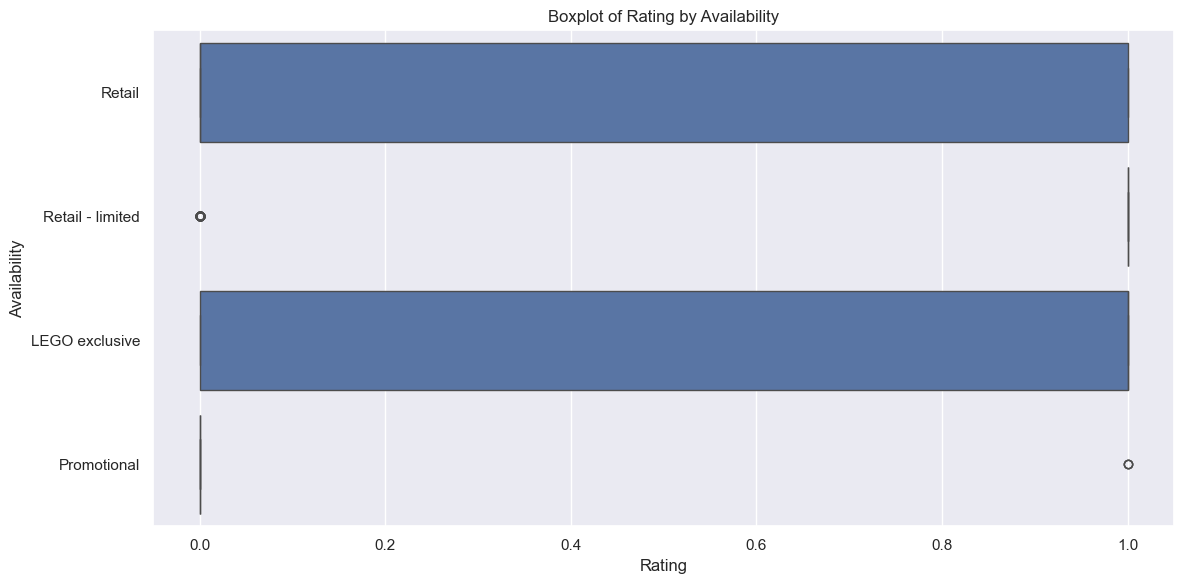

In [441]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=theme, y='Availability', x='Ratings')
plt.title('Boxplot of Rating by Availability')
plt.xlabel('Rating')
plt.ylabel('Availability')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



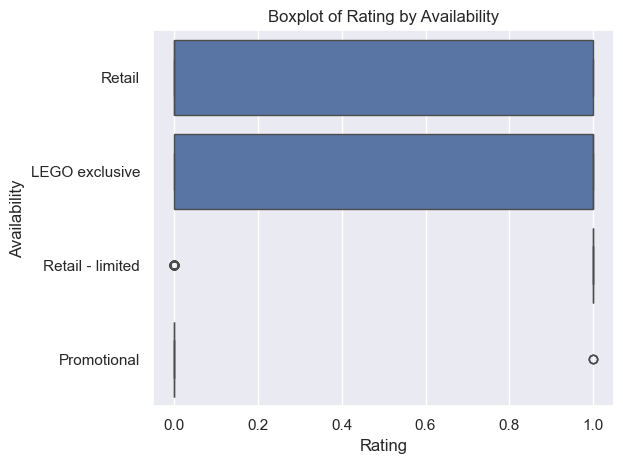

In [442]:
## using cleanedplt.figure(figsize=(12, 6))
sb.boxplot(data=cleaned_data_iqr, y='Availability', x='Ratings')
plt.title('Boxplot of Rating by Availability')
plt.xlabel('Rating')
plt.ylabel('Availability')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



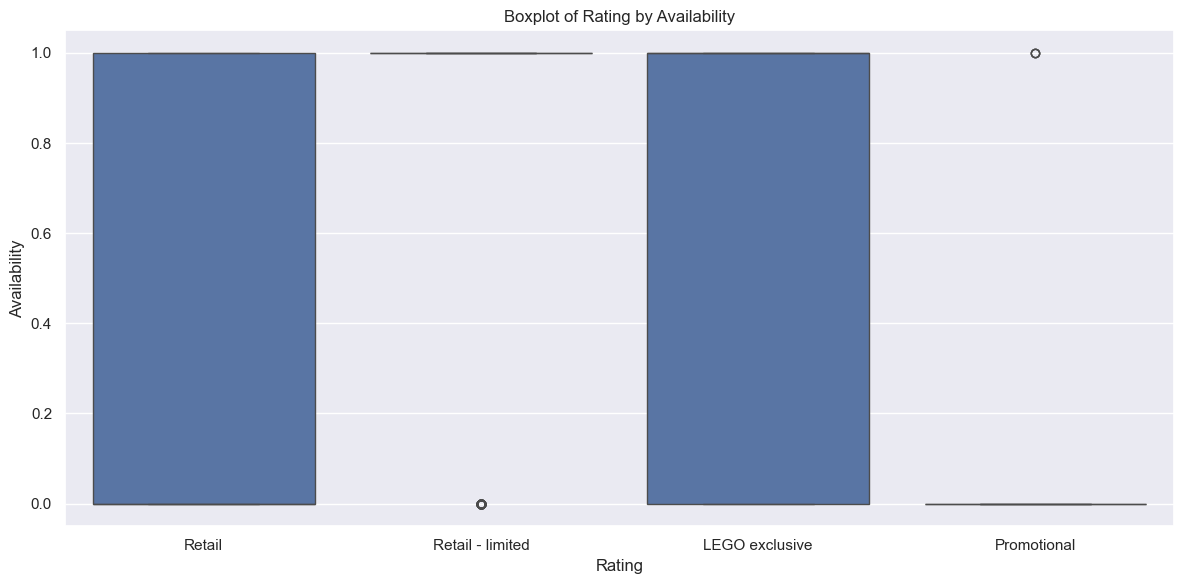

In [443]:
plt.figure(figsize=(12, 6))
sb.boxplot(data=theme, x='Availability', y='Ratings')
plt.title('Boxplot of Rating by Availability')
plt.xlabel('Rating')
plt.ylabel('Availability')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [444]:
availability_counts = theme['Availability'].value_counts()

print("Number of data in each categorical level of availability:")
print(availability_counts)

Number of data in each categorical level of availability:
Availability
Retail              5874
LEGO exclusive       535
Retail - limited     317
Promotional           14
Name: count, dtype: int64


In [445]:
availability_counts = cleaned_data_iqr['Availability'].value_counts()

print("Number of data in each categorical level of availability:")
print(availability_counts)

Number of data in each categorical level of availability:
Availability
Retail              5620
LEGO exclusive       378
Retail - limited     261
Promotional           14
Name: count, dtype: int64


## <span style="color:#E26EE5">Don't use availability due to no correlation</span>


C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='Minifigures'>

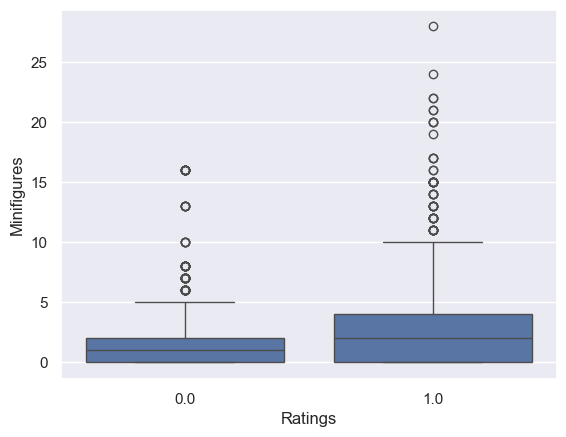

In [446]:
##minifigs against ratings
sb.boxplot(data = theme,x = 'Ratings', y='Minifigures')

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='Minifigures'>

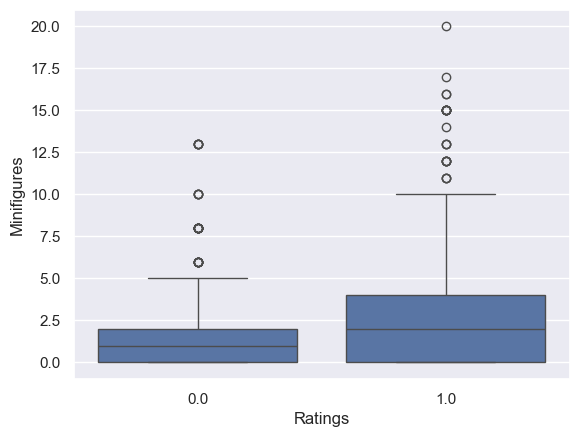

In [447]:
##cleaned minifigs against ratings
sb.boxplot(data = cleaned_data_iqr,x = 'Ratings', y='Minifigures')

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='USD_MSRP'>

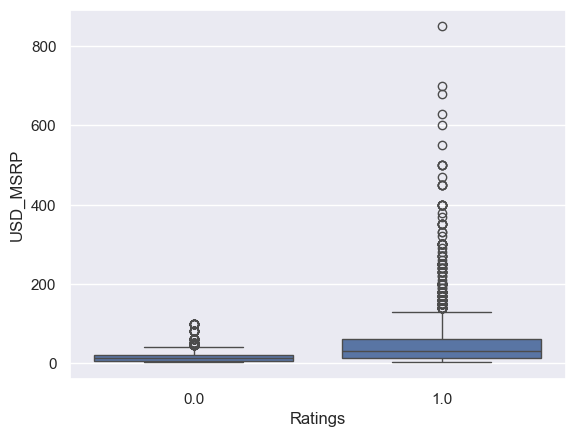

In [448]:
##pieces against ratings
sb.boxplot(data = theme,x = 'Ratings', y='USD_MSRP')

C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='USD_MSRP'>

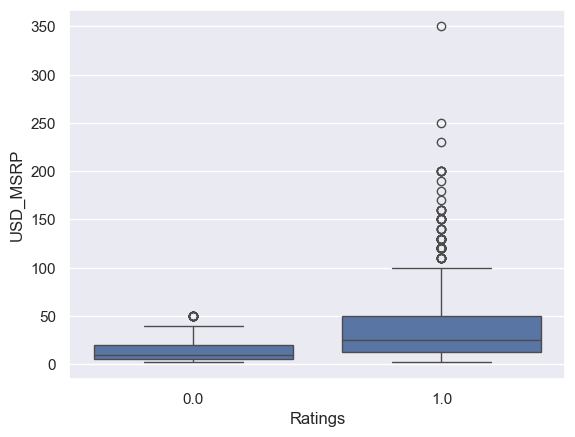

In [449]:
##cleaned USD_MSRP against ratings
sb.boxplot(data = cleaned_data_iqr,x = 'Ratings', y='USD_MSRP')

In [450]:
## change the theme to one hot numbers

from sklearn.preprocessing import LabelEncoder

def encode_column(df, column_name):
    # Make a copy of the DataFrame to avoid modifying the original data
    encoded_df = df.copy()
    
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Encode the column
    encoded_column = label_encoder.fit_transform(encoded_df[column_name])
    
    # Create a mapping dictionary
    category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
    # Update the DataFrame with the encoded column
    encoded_df[column_name + '_encoded'] = encoded_column
    
    return encoded_df, category_mapping

# Example usage
encoded_data, category_mapping = encode_column(cleaned_data_iqr, 'Theme_Group')


In [451]:
encoded_data.head(5)

,Name,Theme,Pieces,Minifigures,USD_MSRP,Availability,Theme_Group,Ratings,Theme_Group_encoded
11730,City Advent Calendar,City,248.0,6.0,29.99,Retail,Modern day,0.0,9
7619,Space Speeder,Space,14.0,1.0,3.49,Retail,Action/Adventure,0.0,0
9612,Cat's Playground,Friends,31.0,0.0,4.99,Retail,Modern day,0.0,9
12594,Ariel's Castle,Disney,115.0,1.0,24.99,Retail,Licensed,0.0,6
10881,Homing Spider Droid Microfighter,Star Wars,102.0,1.0,9.99,Retail,Licensed,0.0,6


C:\Users\gohis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



<Axes: xlabel='Ratings', ylabel='Theme_Group_encoded'>

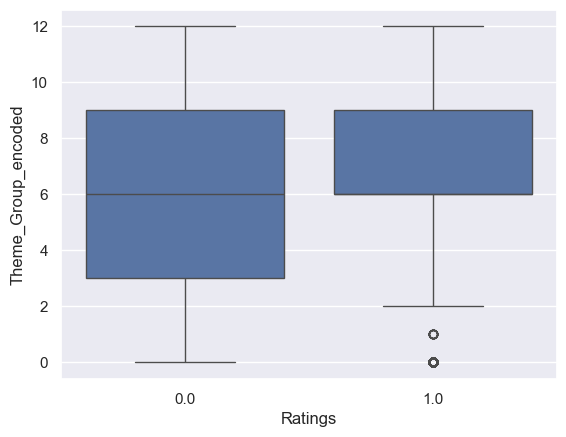

In [452]:
##theme against rating
##pieces against ratings
sb.boxplot(data = encoded_data,x = 'Ratings', y='Theme_Group_encoded')

## <span style="color:#E26EE5">Machine Learning: Basic Decision Tree</span>


In [453]:
##Decision tree
#https://scikit-learn.org/stable/modules/tree.html
def train_and_predict(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import plot_tree

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Ratings'])
    X = pd.DataFrame(dataframe[["USD_MSRP", "Pieces", "Minifigures", "Theme_Group_encoded"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
    dectree.fit(X_train, y_train)                    # train the decision tree model

    # Predict Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)
      
    f = plt.figure(figsize=(30,8))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["USD_MSRP", "Pieces", "Minifigures", "Theme_Group_encoded"])  # Corrected feature names

    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model: Train Dataset")
    print("Classification Accuracy : ", dectree.score(X_train, y_train))
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ", FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model: Test Dataset")
    print("Classification Accuracy : ", dectree.score(X_test, y_test))
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ",FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "Greens")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Greens")

Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.8052721088435374
True Negative Rate      :  0.9634819532908705
True Positive Rate      :  0.6466581524052788
False Negative Rate     :  0.35334184759472115
False Positive Rate     :  0.03651804670912951

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.7992351816443595
True Negative Rate      :  0.9620733249051833
True Positive Rate      :  0.6336760925449871
False Negative Rate     :  0.36632390745501286
False Positive Rate     :  0.03792667509481669


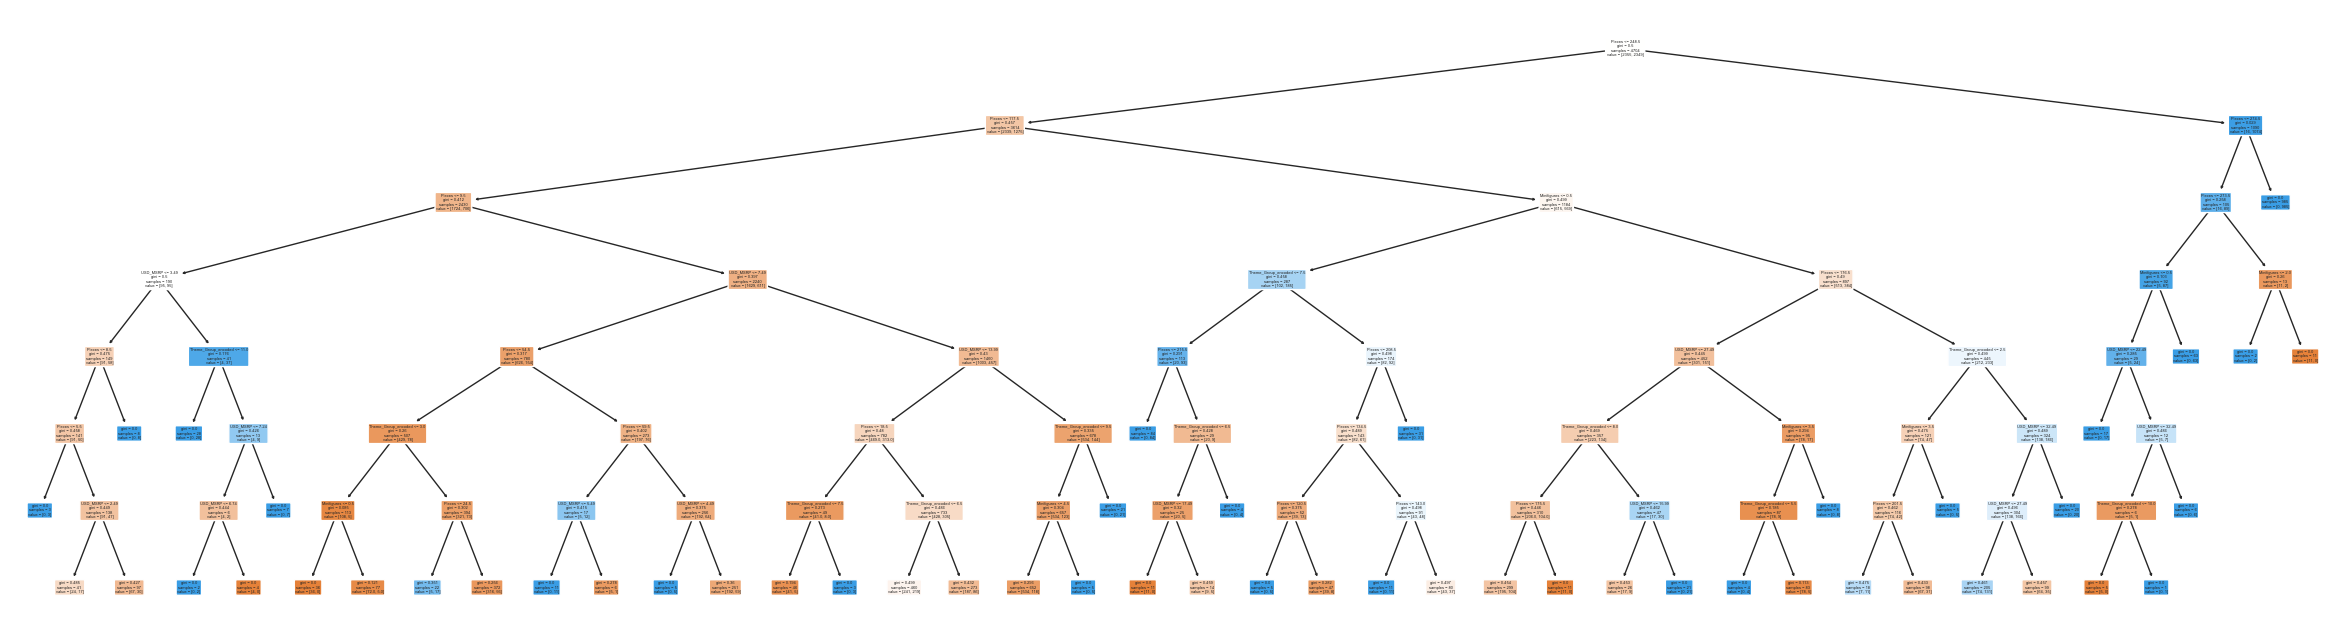

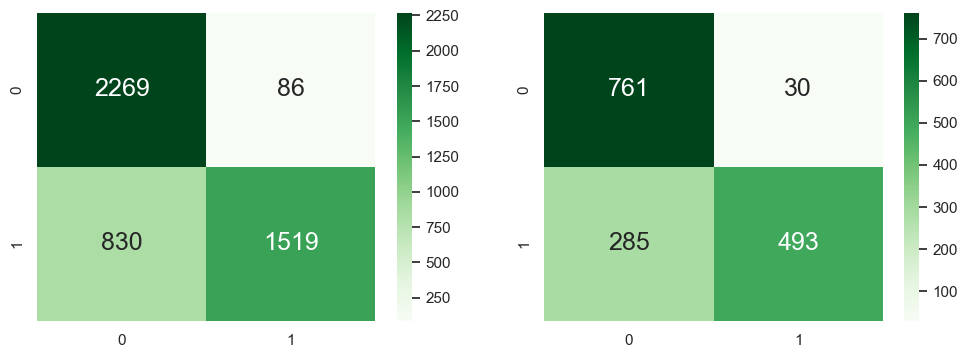

In [454]:
train_and_predict(encoded_data)

Check Point: Analysis
A decision tree was used for multi variate analysis after class balancing of the ratings. The classification accuracy for the train dataset was higher than the classification accuracy by 3% for the test dataset, this similar trend can be observed in both true positive rate and false negative rate. This may suggests that slight overfitting has occured.

False negative rate should not be high because when the predictors are meant to give high rating, the sellers would be misguided and they will assume that they will get a lower rating, this could still lead to missed opportunities to leverage positive reviews for marketing or other purposes. With less marketing, potential customers will then miss out on a product that they would have rate highly for.


When using the decision tree, the class with review score 0 had to be over sampled. This can lead to inaccuracies in the prediction.

## <span style="color:#E26EE5">Machine Learning: Random Forest</span>


In [455]:
def train_and_predict(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Ratings'])
    X = pd.DataFrame(dataframe[["USD_MSRP", "Pieces", "Minifigures", "Theme_Group_encoded"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = 1000,  # n_estimators denote number of trees
                                     max_depth = 8)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.Ratings.ravel())

    # Predict the Response corresponding to Predictors
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model: Train Dataset")
    print("Classification Accuracy : ", rforest.score(X_train, y_train))
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ", FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model: Test Dataset")
    print("Classification Accuracy : ", rforest.score(X_test, y_test))
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ",FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap ="Blues")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\885693740.py:22: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.8452380952380952
True Negative Rate      :  0.9911317567567568
True Positive Rate      :  0.697345890410959
False Negative Rate     :  0.3026541095890411
False Positive Rate     :  0.008868243243243243

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.822817080943276
True Negative Rate      :  0.9897172236503856
True Positive Rate      :  0.6586599241466498
False Negative Rate     :  0.3413400758533502
False Positive Rate     :  0.010282776349614395


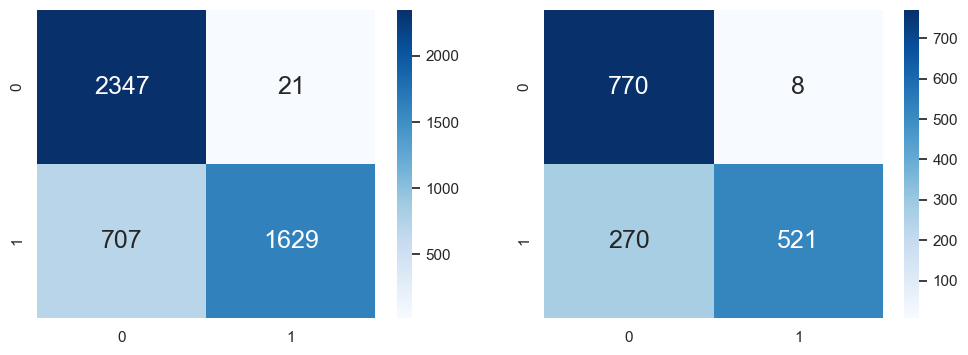

In [456]:
train_and_predict(encoded_data)

Check Point: Analysis
There is a significant improvement in the performance of the machine learning model when using random forest as opposed to using decision tree. The classification accuracy increases to almost 85% for most product types. Additionally, the false negative rates drop below 30%. Furthermore, the classification rates are much more similar between the test and train dataset, implying that  the likelihood of over or underfitting has decreased.However, more can be done to find the hyperparameters which results in the most accurate random forest model being made, potentially lower false negative rates even more.

Hyperparameters in this case is the n_estimators and the max_depth which is the number of decision trees in the forest and the maximum depth each tree respectively. Grid Search is used to find the best hyperparameters.

## <span style="color:#E26EE5">Machine Learning: Grid Search</span>


In [457]:
def best_hyperparameter(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Ratings'])
    X = pd.DataFrame(dataframe[["USD_MSRP", "Pieces", "Minifigures", "Theme_Group_encoded"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    # Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
    from sklearn.model_selection import GridSearchCV

    # Define the Hyper-parameter Grid to search on, in case of Random Forest
    param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
                  'max_depth': np.arange(2, 11)}             # depth of trees 2, 3, 4, 5, ..., 10

    # Create the Hyper-parameter Grid
    hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                          param_grid,                 # the search grid
                          cv = 5,                     # 5-fold cross-validation
                          scoring = 'accuracy')       # score to evaluate

    # Train the models using Cross-Validation
    hpGrid.fit(X_train, y_train.Ratings.ravel())
    
    # Fetch the best Model or the best set of Hyper-parameters
    best  = hpGrid.best_estimator_
    print(best)
    
    # Get the maximum depth of the trees
    max_depth = best.max_depth
    print(max_depth)

    # Get the number of estimators (trees) in the ensemble
    n_estimators = best.n_estimators
    print(n_estimators)
    
    # Print the score (accuracy) of the best Model after CV
    print(np.abs(hpGrid.best_score_))
    
    return best

In [458]:
best = best_hyperparameter(encoded_data)


C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\2121735355.py:29: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



RandomForestClassifier(max_depth=10, n_estimators=500)
10
500
0.8677703665181902


In [459]:
def train_and_predict(dataframe, estim, mdepth):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Ratings'])
    X = pd.DataFrame(dataframe[["USD_MSRP", "Pieces", "Minifigures", "Theme_Group_encoded"]]) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = estim,  # n_estimators denote number of trees
                                     max_depth = mdepth)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.Ratings.ravel())

    # Predict the Response corresponding to Predictors
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model: Train Dataset")
    print("Classification Accuracy : ", rforest.score(X_train, y_train))
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
    TN = confusion_matrix_train[0,0]
    TP = confusion_matrix_train[1,1]
    FP = confusion_matrix_train[0,1]
    FN = confusion_matrix_train[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ", FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model: Test Dataset")
    print("Classification Accuracy : ", rforest.score(X_test, y_test))
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
    TN = confusion_matrix_test[0,0]
    TP = confusion_matrix_test[1,1]
    FP = confusion_matrix_test[0,1]
    FN = confusion_matrix_test[1,0]
    print("True Negative Rate      : ", TN/(TN+FP))
    print("True Positive Rate      : ", TP/(TP+FN))
    print("False Negative Rate     : ",FN/(FN+TP))
    print("False Positive Rate     : ", FP/(TN+FP))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "Oranges")
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap= "Oranges")

C:\Users\gohis\AppData\Local\Temp\ipykernel_22156\4047256991.py:22: FutureWarning:

Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.



Goodness of Fit of Model: Train Dataset
Classification Accuracy :  0.8888180272108843
True Negative Rate      :  0.9970389170896785
True Positive Rate      :  0.7794871794871795
False Negative Rate     :  0.2205128205128205
False Positive Rate     :  0.002961082910321489

Goodness of Fit of Model: Test Dataset
Classification Accuracy :  0.8661567877629063
True Negative Rate      :  0.9961636828644501
True Positive Rate      :  0.7369758576874206
False Negative Rate     :  0.2630241423125794
False Positive Rate     :  0.0038363171355498722


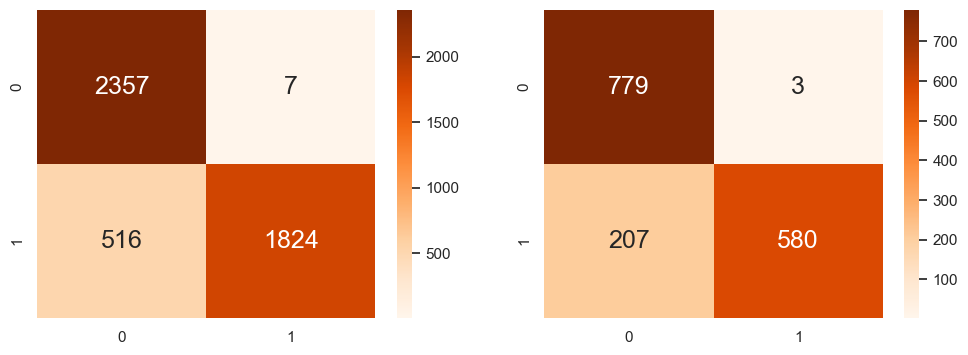

In [460]:
train_and_predict(encoded_data, best.n_estimators, best.max_depth)

Check Point: Analysis
After feeding in the best hyperparameters obtained through the GV Search, it can be seen that the train and test classification accuracy is very similar. This suggests that no overfitting occurred. Overfitting occurs when the train dataset has good classification accuracy, true positive and true negative but terrible classification accuracy, true positive and true negative when test data is used. In the above scenario, the classification accuracy, true positive and false positive is similar for both test and train. Hence, no overfitting has occurred.

However, classification accuracy, false negative is still very high in the test data set compared to the train dataset and this could be due to the upsampling of review score 0 done earlier. Upscaling can lead to overfitting.

## <span style="color:#E26EE5">Conclusion</span>


In Conclusion and summary to the entire project,
A decision tree is a basic machine learning tool that did not provide a very high classification accuracy(65% to 75%), true positive(60% to 85%) and true negative(50% to 60%). There was a large distribution of these values across product types too. Every time the notebook is run, the train and test classification accuracy would differ from a range of 1% to 10%. Additionally, false positive was above 40% for most product types across multiple runs of the ipynb. This shows that the machine learning tool was not the best.

Another option was to run random forest. A random forest uses a 'forest', a multitude of decisions trees that help to classify the data points into the different review scores. The reason why random forest works so well is that "A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models." [1]

There is low correlation between the trees and the trees help to cover each others errors to enable the most accurate classification. Hence we see that the random forest does enable better classification in part 7. Classification accuracy increase above 80% and false positive rates fell below 30%. Train and test were similar in terms of classification accuracy.

False positives are generally bad given our reseach question. This is because sellers want to adjust their actual delivery time, the difference between actual and estimated wait time, freight value, payment value, payment installment such that they obtain the best review score 1 which is translated to 3 to 5 review score. If they adjust these factors and get a false positive, then they may predict a high review score but end up getting a low one.

Hence, although the classification accuracy is relatively better, an additional step must be done to reduce the false positive. Tuning of hyperparameters must be done to achieve the highest possible classification accuracy, true positive and true negative and lowest possible false positive and false negative. Hyperparameters are used to make the random forest. There are many hyperparameters but for the scope of this project max_depth and n_estimators were chosen. max_depth is the maximum depth each decision tree goes in the 'forest' of trees. n_estimators is the number of trees in the forest. [2]

To find the best hyperparemeters a Grid Search is done.[3][4][5][6][7][8]

Grid Search will then run a range for the hyperparameters as seen in part 7. The definition provided by Sci-Kit is "The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid." Cross validation is defined as "Cross validation is a statistical method used to estimate the performance (or accuracy) of machine learning models." [9]

Best score is the "Mean cross-validated score of the best_estimator". Since cv = 5, the train and test split will occur five times for each hyperparameter. The best score is calculated for each try and for each combination of hyperparameters. The best score will return the average of the best hyperparameter combination in those 5 tries.

This function will return the best hyperparameters max_depth and n_estimators. These are then run into the random forest in this very ipynb. Seen from above, classification accuracy, true positive and true negative are above 95% and false positive and false negative are below 1% for all product types. Train and test data are very similar. Hence, there is no overfitting as explained earlier.

Reference List (for this notebook):

“sklearn.ensemble.randomforestclassifier¶.” [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. [Accessed: 21-Apr-2021].

R. Meinert, “Optimizing Hyperparameters in Random Forest Classification,” Medium, 07-Jun-2019. [Online]. Available: https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6. [Accessed: 21-Apr-2021].

M. Sharma, “Grid Search for Hyperparameter Tuning,” Medium, 21-Mar-2020. [Online]. Available: https://towardsdatascience.com/grid-search-for-hyperparameter-tuning-9f63945e8fec. [Accessed: 21-Apr-2021].

“sklearn.model_selection.GridSearchCV¶,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. [Accessed: 21-Apr-2021].

J. Brownlee, “Hyperparameter Optimization With Random Search and Grid Search,” Machine Learning Mastery, 18-Sep-2020. [Online]. Available: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/. [Accessed: 21-Apr-2021].

Shahul ES Freelance Data Scientist | Kaggle Master Data science professional with a strong end to end data science/machine learning and deep learning (NLP) skills. Experienced working in a Data Science/ML Engineer role in multiple startups. K, S. ES, Freelance Data Scientist | Kaggle Master Data science professional with a strong end to end data science/machine learning and deep learning (NLP) skills. Experienced working in a Data Science/ML Engineer role in multiple startups. Kaggle Kernels Master ra, and F. me on, “Hyperparameter Tuning in Python: a Complete Guide 2021,” neptune.ai, 19-Mar-2021. [Online]. Available: https://neptune.ai/blog/hyperparameter-tuning-in-python-a-complete-guide-2020#:~:text=Hyperparameter%20tuning%20is%20the%20process,maximum%20performance%20out%20of%20models. [Accessed: 21-Apr-2021].

R. Joseph, “Grid Search for model tuning,” Medium, 29-Dec-2018. [Online]. Available: https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e. [Accessed: 21-Apr-2021].

abuabu 54777 silver badges1616 bronze badges, Mischa LisovyiMischa Lisovyi 2, and Vivek KumarVivek Kumar 28.8k66 gold badges7575 silver badges109109 bronze badges, “Interpreting sklearns' GridSearchCV best score,” Stack Overflow, 01-Feb-1967. [Online]. Available: https://stackoverflow.com/questions/50232599/interpreting-sklearns-gridsearchcv-best-score. [Accessed: 21-Apr-2021].

H. M. -, By, -, Hussain MujtabaHussain is a computer science engineer who specializes in the field of Machine Learning.He is a freelance programmer and fancies trekking, H. Mujtaba, Hussain is a computer science engineer who specializes in the field of Machine Learning.He is a freelance programmer and fancies trekking, and P. enter your name here, “What is Cross Validation in Machine learning? Types of Cross Validation,” GreatLearning Blog: Free Resources what Matters to shape your Career!, 24-Sep-2020. [Online]. Available: https://www.mygreatlearning.com/blog/cross-validation/. [Accessed: 21-Apr-2021].